Learn Spatially invariant features by introducing Keras layers functions

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
NUM_CLASSES = 10 #Number of classes

RESHAPED = 784 #Reshape 28*28 pixel to flatten array of 784 pixels

In [ ]:
HIDDEN_NEURONS = 256

In [ ]:
IMG_ROWS, IMG_COLS = 28, 28

INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1) #1 channel as black and white images, 3 for color images RGB

In [ ]:
fashion_data = tf.keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()
train_images = train_images.reshape(60000, IMG_ROWS, IMG_COLS, 1)
test_images = test_images.reshape(10000, IMG_ROWS, IMG_COLS, 1)

train_images, test_images = train_images/255.0, test_images/255.0


4422102/4422102 [==============================] - 1s 0us/step


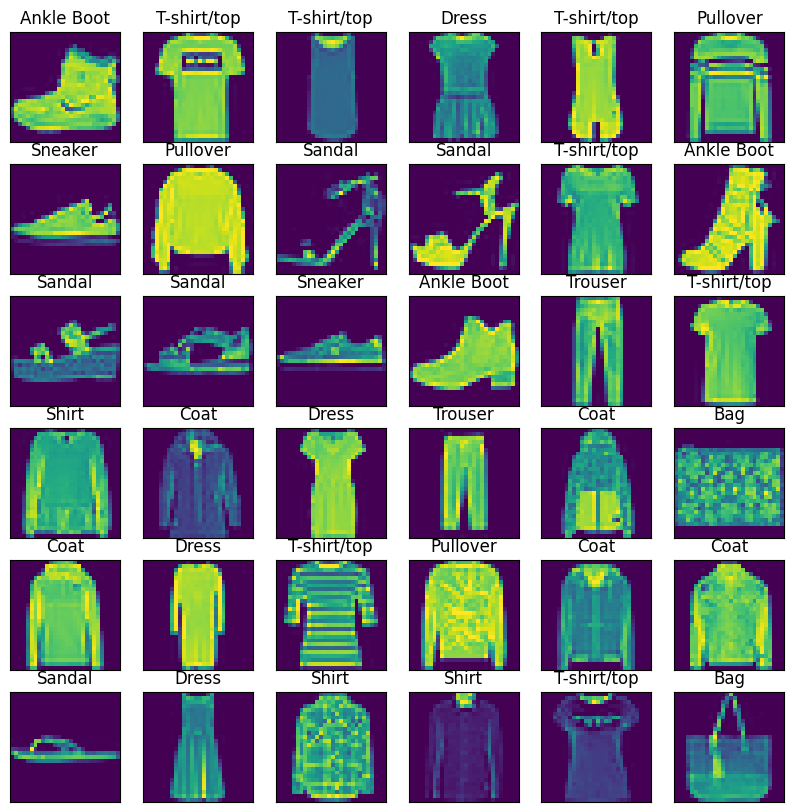

In [ ]:
#Visualization

#Dict for each label

labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape((IMG_ROWS, IMG_COLS)))
  label_index = train_labels[i]
  plt.title(labels[label_index])

plt.show()

In [ ]:
#one hot rerpresentations for labels

train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [ ]:
#Improvements to the NN, adding Hidden layers and changing activation function and optimizer

#define architecture of our CNN

#dropout layers and L2 regularization
class cnn_fmnist: #CNN - convolutional Neural Network
  @staticmethod
  def build(input_shape, classes, use_l2_reg = False, l2_loss_lambda= 0.00025):
    l2  = regularizers.l2(l2_loss_lambda) if use_l2_reg else None
    #Printing this as we cannot visualize it
    if l2 is not None: print("Using L2 regularization %.6f" %l2_loss_lambda)
    model = Sequential([
        #CONV => RELU => POOL
        Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same',
               kernel_regularizer = l2, input_shape = input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.15),

        Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same',
               kernel_regularizer = l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same',
               kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),

        Flatten(),
        Dropout(0.4),


        Dense(1024, activation = 'relu', kernel_regularizer = l2),
        Dropout(0.4),
        Dense(512, activation = 'relu', kernel_regularizer= l2),
        Dropout(0.2),
        Dense(NUM_CLASSES, activation = 'softmax')

    ])
    return model

In [ ]:
model = cnn_fmnist.build(input_shape=INPUT_SHAPE, classes = NUM_CLASSES, use_l2_reg=True)

adam = Adam(learning_rate = 0.0001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Using L2 regularization 0.000250
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 

In [ ]:
# import train, optimizer, compile, train
##Train the model
#Constants

BATCH_SIZE = 128
EPOCHS = 50
VALIDATION_SPLIT = .2

history = model.fit(train_images, train_labels, batch_size= BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 142s 373ms/step - loss: 1.7406 - accuracy: 0.5787 - val_loss: 1.7962 - val_accuracy: 0.5704
Epoch 2/50
375/375 [==============================] - 128s 342ms/step - loss: 1.2223 - accuracy: 0.7203 - val_loss: 1.0270 - val_accuracy: 0.7959
Epoch 3/50
375/375 [==============================] - 130s 347ms/step - loss: 1.1104 - accuracy: 0.7581 - val_loss: 0.9343 - val_accuracy: 0.8242
Epoch 4/50
375/375 [==============================] - 131s 348ms/step - loss: 1.0345 - accuracy: 0.7822 - val_loss: 0.8853 - val_accuracy: 0.8361
Epoch 5/50
375/375 [==============================] - 131s 349ms/step - loss: 0.9837 - accuracy: 0.8020 - val_loss: 0.8569 - val_accuracy: 0.8441
Epoch 6/50
375/375 [==============================] - 131s 349ms/step - loss: 0.9324 - accuracy: 0.8189 - val_loss: 0.8234 - val_accuracy: 0.8525
Epoch 7/50
375/375 [==============================] - 130s 347ms/step - loss: 0.8938 - accuracy: 0.8278 - val_loss: 0.7955 -

In [ ]:
#Evaluation

score = model.evaluate(test_images, test_labels)
print("Test score ", score[0])
print("Test Accuracy: ", score[1])


313/313 [==============================] - 8s 25ms/step - loss: 0.3267 - accuracy: 0.9264
Test score  0.32668232917785645
Test Accuracy:  0.9264000058174133


Text(0.5, 1.0, 'Train - Accuracy')

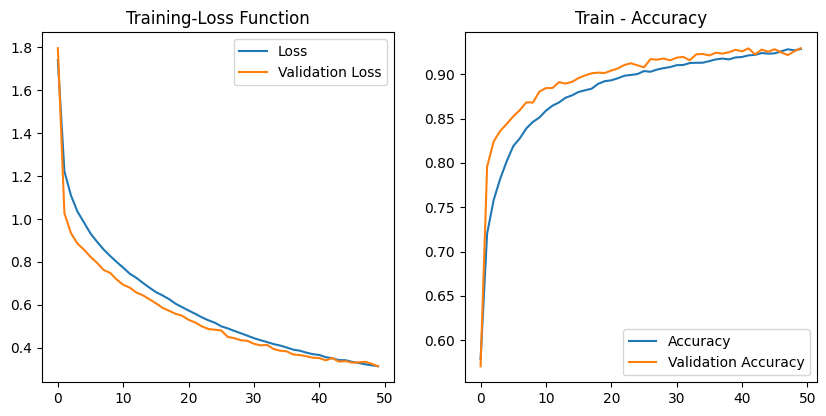

In [ ]:
#Plot loss and accuracy functions for training and Validation sets


plt.figure(figsize=(10,10))
plt.subplot(2,2,1)

plt.plot(history.history['loss'], label= 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Training-Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
#get predictions for the test data , convert to integer

predicted_classes = np.around(model.predict(test_images))
predicted_classes = np.argmax(predicted_classes, axis = 1)

#get indices to be plotted

test_labels = np.argmax(test_labels, axis=1)

correct = np.nonzero(predicted_classes == test_labels)[0]
incorrect = np.nonzero(predicted_classes != test_labels)[0]

313/313 [==============================] - 8s 24ms/step


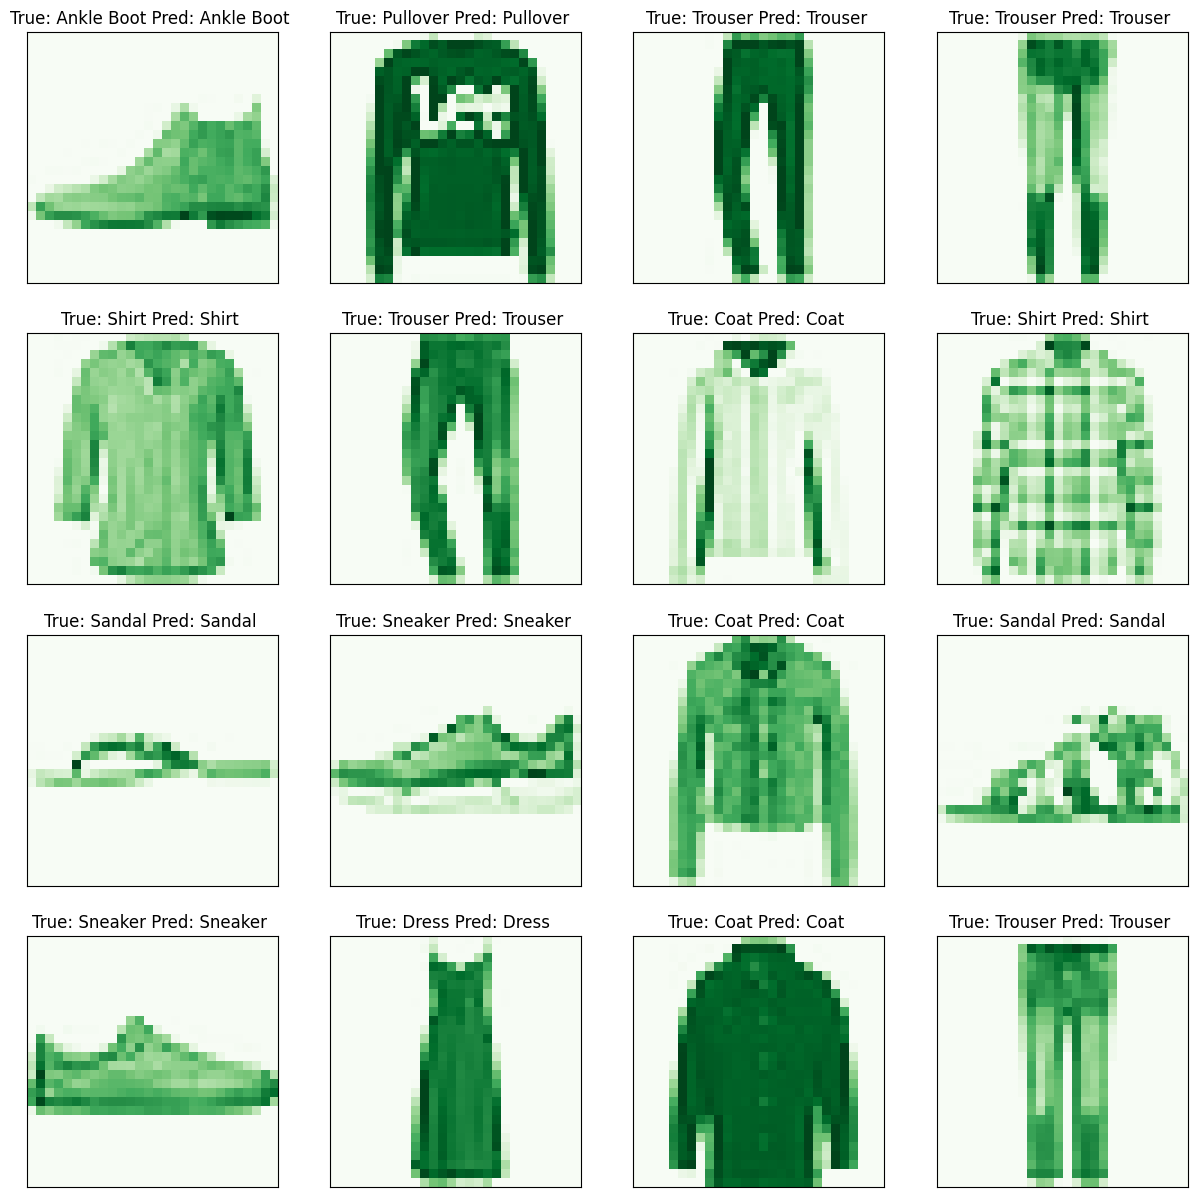

In [ ]:
#Visualization

#Dict for each label


plt.figure(figsize=(15,15))
for i, indx in enumerate(correct[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[indx].reshape((IMG_ROWS, IMG_COLS)), cmap = "Greens")
  label_index = train_labels[indx]
  plt.title("True: {} Pred: {} ".format(labels[test_labels[indx]], labels[predicted_classes[indx]]))

plt.show()

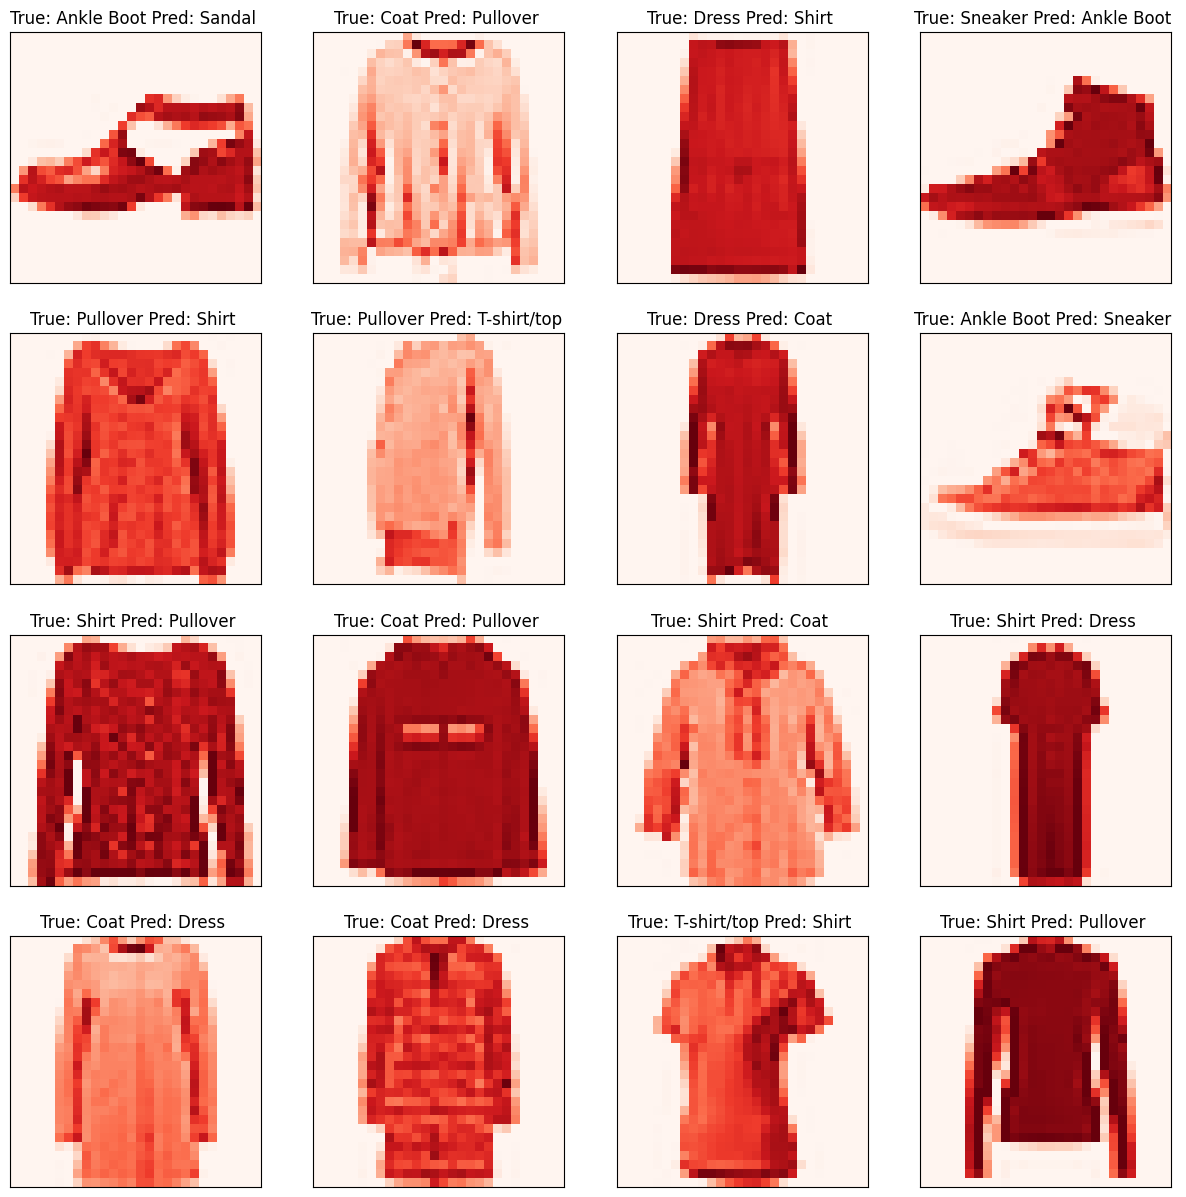

In [ ]:
#Visualization

#Dict for each label


plt.figure(figsize=(15,15))
for i, indx in enumerate(incorrect[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[indx].reshape((IMG_ROWS, IMG_COLS)), cmap = "Reds")
  label_index = train_labels[indx]
  plt.title("True: {} Pred: {} ".format(labels[test_labels[indx]], labels[predicted_classes[indx]]))

plt.show()